## Data Analyis: Part 2

### RQ2: What is the relationship between various weather measures and dengue cases in Singapore?
#### H4: Precipitation rate is positively correlated with the number of dengue cases in Singapore.
#### H5: Relative humidity is positively correlated with the number of dengue cases in Singapore.
#### H6: Hours of sunshine is positively correlated with the number of dengue cases in Singapore.

_Note: Read the RQ1 notebook first. Read the RQ3 notebook after this._

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

In [67]:
dengue_cases = pd.read_csv('../data/cleaned/dengue_clean.csv')
weather = pd.read_csv('../data/cleaned/weather_clean.csv')

In [68]:
dengue_weather = weather.merge(dengue_cases, how='inner')
dengue_weather

,year,week,temp_max,temp_min,temp_mean,temp_app_max,temp_app_min,temp_app_mean,rain_mm,rain_hours,evapotranspiration,sun_hours,rh_mean,windspeed_mean,rain_sum,cases
0,2012,1,29.528571,24.728571,26.785714,34.714286,28.542857,30.857143,1.271429,3.571429,3.982857,9.714286,84.814286,14.957143,8.9,74
1,2012,2,28.014286,24.128571,25.642857,32.357143,27.571429,29.414286,6.114286,12.714286,2.622857,4.428571,88.157143,14.442857,42.8,66
2,2012,3,29.757143,24.700000,26.828571,36.985714,29.600000,32.371429,5.500000,6.714286,3.771429,8.857143,86.557143,6.171429,38.5,61
3,2012,4,29.557143,24.342857,26.371429,34.457143,27.842857,30.242857,4.985714,4.285714,3.855714,7.714286,84.400000,14.271429,34.9,52
4,2012,5,28.885714,24.614286,26.357143,34.385714,28.657143,30.914286,4.857143,11.285714,3.287143,6.714286,86.857143,11.428571,34.0,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,2022,48,30.214286,25.014286,26.842857,36.514286,29.771429,32.242857,14.557143,16.428571,3.401429,7.571429,86.714286,7.128571,101.9,242
570,2022,49,30.114286,24.985714,26.814286,36.271429,29.671429,32.114286,11.642857,16.714286,2.910000,5.571429,86.471429,7.185714,81.5,327
571,2022,50,28.542857,25.042857,26.328571,34.014286,29.628571,31.414286,15.171429,18.714286,2.588571,3.857143,88.114286,8.271429,106.2,290
572,2022,51,29.114286,24.842857,26.428571,34.285714,28.742857,30.828571,8.285714,14.285714,3.042857,6.142857,86.528571,12.314286,58.0,270


#### **H4: Precipitation rate is positively correlated with the number of dengue cases in Singapore.**

In [78]:
# simplifying the dataframe for H4
h4_df = dengue_weather[['year','week','rain_mm','cases','rain_sum', 'temp_mean']].copy()
h4_df

,year,week,rain_mm,cases,rain_sum,temp_mean
0,2012,1,1.271429,74,8.9,26.785714
1,2012,2,6.114286,66,42.8,25.642857
2,2012,3,5.500000,61,38.5,26.828571
3,2012,4,4.985714,52,34.9,26.371429
4,2012,5,4.857143,85,34.0,26.357143
...,...,...,...,...,...,...
569,2022,48,14.557143,242,101.9,26.842857
570,2022,49,11.642857,327,81.5,26.814286
571,2022,50,15.171429,290,106.2,26.328571
572,2022,51,8.285714,270,58.0,26.428571


In [79]:
corrs = []

for year, year_data in h4_df.groupby('year'):
    corrs.append(year_data.corr())
    
corrs_df = pd.concat(corrs)
corr_overall = corrs_df.groupby(corrs_df.index, sort=False).mean()
corr_overall.drop('year', inplace=True)
corr_overall.drop('year', axis=1, inplace=True)
corr_overall

,week,rain_mm,cases,rain_sum,temp_mean
week,1.000000,0.253081,0.023668,0.253081,-0.039530
rain_mm,0.253081,1.000000,-0.065320,1.000000,-0.458299
cases,0.023668,-0.065320,1.000000,-0.065320,0.160088
rain_sum,0.253081,1.000000,-0.065320,1.000000,-0.458299
temp_mean,-0.039530,-0.458299,0.160088,-0.458299,1.000000


There is a negative and weak correlation between precipitation and dengue cases. Hence, we do not have evidence to support H4. It is interesting that there is a negative relationship between precipitation and reported dengue cases. Given that the Aedes mosquito that spreads dengue thrives during rainy seasons, we expected a positive relationship.

On the other hand, it appears that mean temperature is weakly and positively correlated to the number of cases, as would be expected since scientific research show that higher temperatures promote and accelerate Aedes mosquitoes' life cycle, increasing breeding and hence transmission.

In [83]:
# testing lags of 1 week and 10 weeks
h4_df['cases1'] = h4_df['cases'].shift(-1)
h4_df['cases10'] = h4_df['cases'].shift(-10)

In [84]:
corrs = []

for year, year_data in h4_df.groupby('year'):
    corrs.append(year_data.corr())
    
corrs_df = pd.concat(corrs)
corr_overall = corrs_df.groupby(corrs_df.index, sort=False).mean()
corr_overall.drop('year', inplace=True)
corr_overall.drop('year', axis=1, inplace=True)
corr_overall

,week,rain_mm,cases,rain_sum,temp_mean,cases1,cases10
week,1.000000,0.253081,0.023668,0.253081,-0.039530,0.030770,-0.008205
rain_mm,0.253081,1.000000,-0.065320,1.000000,-0.458299,-0.093464,0.151483
cases,0.023668,-0.065320,1.000000,-0.065320,0.160088,0.885254,0.143597
rain_sum,0.253081,1.000000,-0.065320,1.000000,-0.458299,-0.093464,0.151483
temp_mean,-0.039530,-0.458299,0.160088,-0.458299,1.000000,0.223545,0.177909
cases1,0.030770,-0.093464,0.885254,-0.093464,0.223545,1.000000,0.190352
cases10,-0.008205,0.151483,0.143597,0.151483,0.177909,0.190352,1.000000


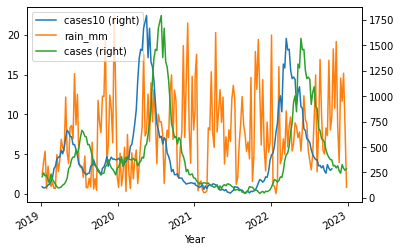

In [82]:
df = h4_df[['cases10','rain_mm','year','week', 'cases']].copy()
df = df[df['year'] > 2018]
df['Year-Epi Week'] = df['year'].astype('str') + '-' + df['week'].astype('str') + '-1'
df['Year'] = pd.to_datetime(df['Year-Epi Week'], format='%Y-%W-%w')
df = df.set_index('Year')
df = df.drop(['year', 'week'], axis=1)
ax = df.plot.line(secondary_y=['cases10', 'cases'])
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()

#### **H5: Relative humidity is positively correlated with the number of dengue cases in Singapore.**

In [24]:
# simplifying the dataframe for H5
h5_df = dengue_weather[['year','week','rh_mean','cases']]
h5_df

,year,week,rh_mean,cases
0,2012,1,84.814286,74
1,2012,2,88.157143,66
2,2012,3,86.557143,61
3,2012,4,84.400000,52
4,2012,5,86.857143,85
...,...,...,...,...
569,2022,48,86.714286,242
570,2022,49,86.471429,327
571,2022,50,88.114286,290
572,2022,51,86.528571,270


In [25]:
corrs2 = []

for year, year_data in h5_df.groupby('year'):
    corrs2.append(year_data.corr())
    
corrs2_df = pd.concat(corrs2)
corr2_overall = corrs2_df.groupby(corrs2_df.index, sort=False).mean()
corr2_overall.drop('year', inplace=True)
corr2_overall.drop('year', axis=1, inplace=True)
corr2_overall

,week,rh_mean,cases
week,1.000000,0.304407,0.023668
rh_mean,0.304407,1.000000,-0.000821
cases,0.023668,-0.000821,1.000000


There is a negative and weak correlation between relative humidity and dengue cases. Furthermore, given that the correlation coefficient for the two variables is -0.001, it seems that the correlation is so weak that it can be considered negligible. Hence, we do not have evidence to support H4. 

Again, it is interesting that there is a negative relationship between relative humidity and reported dengue cases because it defies prior research by dengue experts that claim high humidity levels create better conditions for the Aedes mosquito to breed and thus, spread dengue.

#### **H6: Hours of sunshine is positively correlated with the number of dengue cases in Singapore.**

In [27]:
# simplifying the dataframe for H5
h6_df = dengue_weather[['year','week','sun_hours','cases']]
h6_df

,year,week,sun_hours,cases
0,2012,1,9.714286,74
1,2012,2,4.285714,66
2,2012,3,8.857143,61
3,2012,4,7.571429,52
4,2012,5,6.714286,85
...,...,...,...,...
569,2022,48,7.571429,242
570,2022,49,5.571429,327
571,2022,50,3.857143,290
572,2022,51,6.000000,270


In [28]:
corrs3 = []

for year, year_data in h6_df.groupby('year'):
    corrs3.append(year_data.corr())
    
corrs3_df = pd.concat(corrs3)
corr3_overall = corrs3_df.groupby(corrs3_df.index, sort=False).mean()
corr3_overall.drop('year', inplace=True)
corr3_overall.drop('year', axis=1, inplace=True)
corr3_overall

,week,sun_hours,cases
week,1.000000,-0.304335,0.023668
sun_hours,-0.304335,1.000000,0.045856
cases,0.023668,0.045856,1.000000


There is a positive and weak correlation between hours of sunshine and dengue cases. Although the correlation is positive, it is so weak that it could be considered negligible. Hence, it is difficult to not reject H4.